#Import Library untuk Data Exploration

In [3]:
import pandas as pd
import regex as re

In [4]:
df_alay = pd.read_csv("new_kamusalay.csv", encoding='ISO-8859-1')

#print info df_alay
print(df_alay.head())
print("\n")
print(df_alay.info())
print("\n")
print(df_alay.describe())
print("\n")
print(df_alay.isnull().sum())



  anakjakartaasikasik anak jakarta asyik asyik
0        pakcikdahtua        pak cik sudah tua
1      pakcikmudalagi        pak cik muda lagi
2         t3tapjokowi             tetap jokowi
3                  3x                tiga kali
4              aamiin                     amin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   anakjakartaasikasik       15166 non-null  object
 1   anak jakarta asyik asyik  15166 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB
None


       anakjakartaasikasik anak jakarta asyik asyik
count                15166                    15166
unique               15166                     8638
top           pakcikdahtua                     wkwk
freq                     1                      100


anakjakartaasikasik         0
anak jakarta asyik asyik    0
dtype: int64


In [5]:
df_abusive = pd.read_csv("abusive.csv", encoding='ISO-8859-1')
#print info
print(df_abusive.head())
print("\n")
print(df_abusive.info())
print("\n")
print(df_abusive.describe())
print("\n")
print(df_abusive.isnull().sum())

   ABUSIVE
0     alay
1    ampas
2     buta
3  keparat
4   anjing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None


       ABUSIVE
count      125
unique     125
top       alay
freq         1


ABUSIVE    0
dtype: int64


In [6]:
df_data = pd.read_csv("data.csv", encoding='ISO-8859-1')
#print info
print(df_data.head())
print("\n")
print(df_data.info())
print("\n")
print(df_data.describe())
print("\n")
print(df_data.isnull().sum())

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0 

#Manipulasi Data

In [7]:
range(df_data.shape[0])

range(0, 13169)

In [8]:
df_data_filtered = df_data.drop('Tweet', axis=1, inplace= False)
df_data_filtered.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0


In [9]:
# Menambah kolom klasifikasi (jika Head Speach  1 maka yes, jika 0 maka No)

df_data['Classification'] = "Dummy"
for i in range(df_data_filtered.shape[0]):
    if 1 in df_data_filtered.loc[i].tolist():
        df_data['Classification'][i] = "Yes"
    else:
        df_data['Classification'][i] = "No" 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
klasifikasi = df_data[["Tweet", "HS", "Abusive", "Classification"]]
klasifikasi.head()

,Tweet,HS,Abusive,Classification
0,- disaat semua cowok berusaha melacak perhatia...,1,1,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,Yes


In [11]:
#Menghitung jumlah Head Speach (Yes) dan Non-Head Speach (No)
df_data['Classification'].value_counts()

Yes    7309
No     5860
Name: Classification, dtype: int64

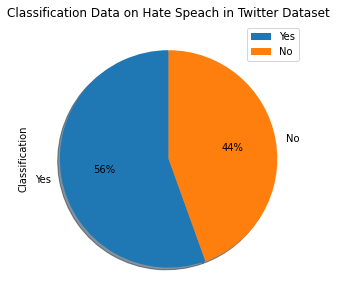

In [12]:
import matplotlib.pyplot as plt

df_data['Classification'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.f%%', startangle=90, shadow=True)

plt.legend(['Yes', 'No'])
plt.title('Classification Data on Hate Speach in Twitter Dataset')

plt.show()

In [13]:
#Jenis Abusive

jenis_HS = df_data[["Tweet", "HS", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]]
jenis_HS.sum() 

Tweet            - disaat semua cowok berusaha melacak perhatia...
HS                                                            5561
HS_Individual                                                 3575
HS_Group                                                      1986
HS_Religion                                                    793
HS_Race                                                        566
HS_Physical                                                    323
HS_Gender                                                      306
HS_Other                                                      3740
HS_Weak                                                       3383
HS_Moderate                                                   1705
HS_Strong                                                      473
dtype: object

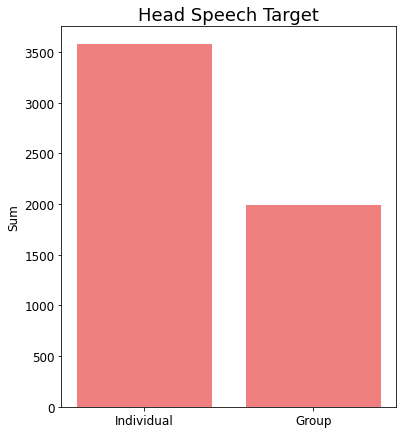

In [14]:
%matplotlib inline
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)

plt.figure(figsize=(6,7))
plt.bar(target_HS, HS1, color='lightcoral')

plt.title('Head Speech Target', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


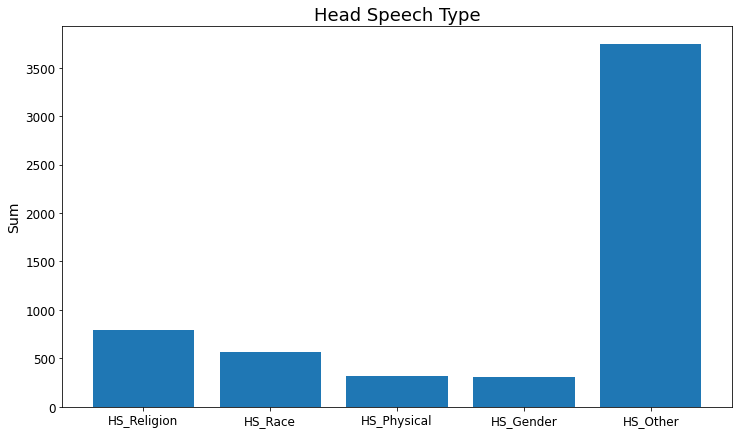

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

type_HS = ["HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]
count = [793, 566, 323, 306, 3740]


plt.figure(figsize=(12,7))
plt.bar(type_HS, count)

plt.title('Head Speech Type', size=18)
plt.ylabel('Sum', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

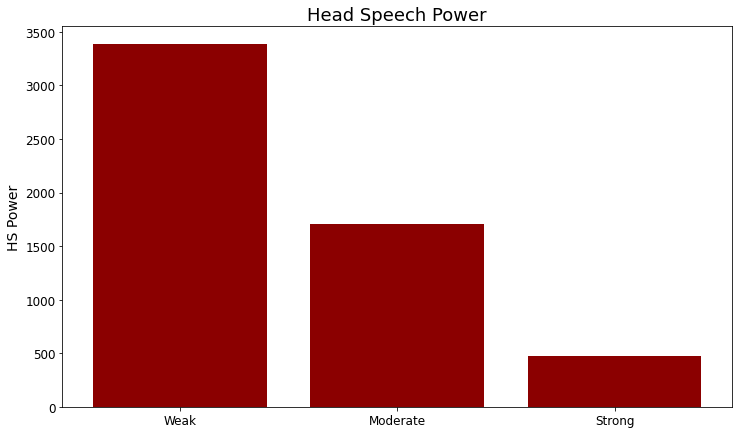

In [16]:
%matplotlib inline

power_HS = ["Weak", "Moderate", "Strong"]
phs = [3383, 1705, 473]


plt.figure(figsize=(12,7))
plt.bar(power_HS, phs, color="darkred")

plt.title('Head Speech Power', size=18)
plt.ylabel('HS Power', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

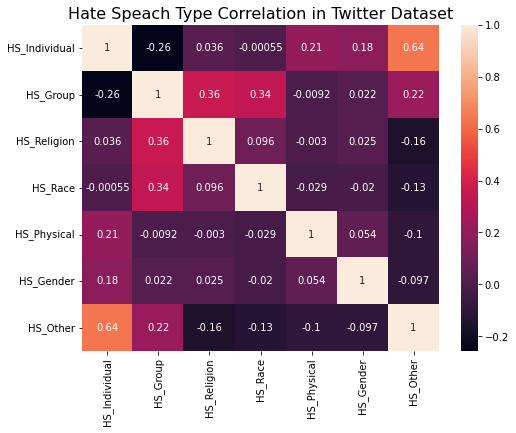

In [17]:
import seaborn as sns
jenis_HS = df_data[["HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]]
corr = jenis_HS.corr()
 
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(jenis_HS.corr(), annot=True)

plt.title('Hate Speach Type Correlation in Twitter Dataset', size = 16)

plt.show()

#Data Cleansing on Hate Speach Dataset

In [18]:
df_alay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [19]:
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'Original', 1: 'Replacement'})
alay_dict.head()

,Original,Replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [20]:
#Syntax untuk melakukan data cleanning
import re

def lowercase(text):
    return text.lower() 

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub(r'pic.twitter.com.[\w]+', '', text) # Remove every pic 
    text = re.sub('gue','saya',text) # Sub gue saya
    text = re.sub(r':', '', text) #Remove symbol :
    text = re.sub(r'‚Ä¶', '', text) #Remove symbol Ä¶
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

#Merubah alay dataframe menjadi dictionary
alay_dict_map = dict(zip(alay_dict['Original'], alay_dict['Replacement']))

#Merubah kata-kata alay menjadi kata baku
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

    #Menguji Syntax Data Cleaning dengan beberpa kalimat contoh
print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT rt USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis


In [21]:
def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay(text)
    return text

In [22]:
df_data = pd.read_csv("data.csv", encoding='ISO-8859-1')
print(df_data['Tweet'].tolist())

["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'", "RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'", '41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter', "USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'", "USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'", "USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84'", 'deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon', 'Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL', 'Nah admin 

In [23]:
df_data['Tweet'] = df_data['Tweet'].apply(preprocess)
df_data_list = df_data['Tweet'].tolist()
print(df_data_list)

[' di saat semua cowok berusaha melacak perhatian saya kamu lantas remehkan perhatian yang saya kasih khusus ke kamu basic kamu cowok bego ', ' siapa yang telat memberi tau kamu edan sarap saya bergaul dengan cigax jifla calis sama siapa itu licew juga ', '41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter', ' aku itu aku dan ku tau matamu sipit tapi dilihat dari mana itu aku ', ' kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha ', ' ya bani taplak dan kawan kawan xf0 x9f x98 x84 xf0 x9f x98 x84 xf0 x9f x98 x84 ', 'deklarasi pilihan kepala daerah 2018 aman dan anti hoaks warga dukuh sari jabon', 'saya baru saja selesai re watch aldnoah zero paling kampret memang akhirnya 2 karakter utama cowoknya kena friendzone bro xd uniform resource locator', 'nah admin bela